<a href="https://colab.research.google.com/github/minicks/BigI/blob/master/temp/temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#마운트

In [0]:
import os, sys 
from google.colab import drive 
drive.mount('/content/mnt') 
nb_path = '/content/notebooks' 
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path) 
sys.path.insert(0, nb_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/mnt


In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# 상관관계


## trainX 상관관계

In [0]:
train_for_heatmap = trainX
train_for_heatmap = train_for_heatmap.dropna()
train_for_heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [60, 30]
correlations =  train_for_heatmap.corr()
# plt.figure(figsize = (14, 12))

# Heatmap of correlations
sns.heatmap(correlations, cmap = plt.cm.RdYlBu_r,  vmin = 0.2, annot = True, vmax = 0.9)
plt.title('Correlation Heatmap');

## trainY 상관관계

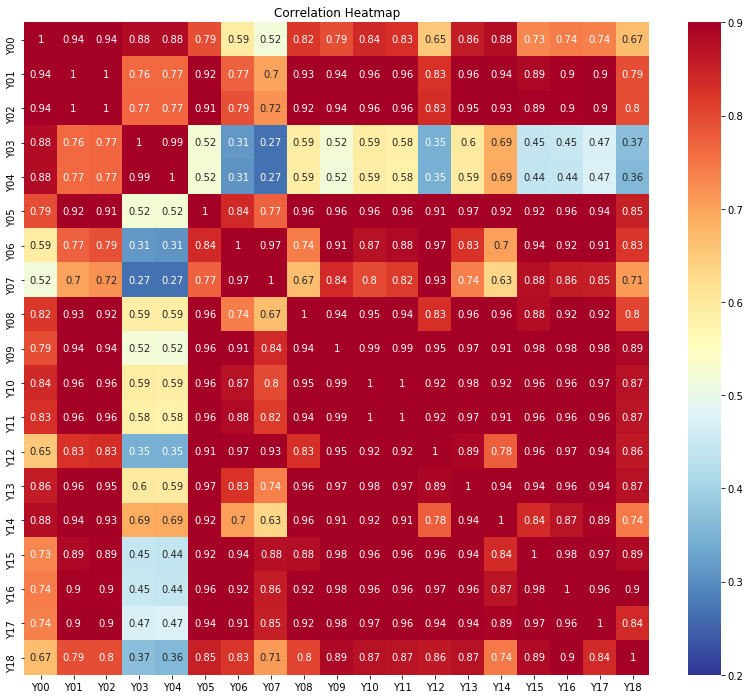

In [0]:
y18 = train[~train['Y18'].isnull()]['Y18'].reset_index(drop= True)
no_y18_target = ['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08','Y09', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17']
no_y18 = train[(train['Y18'].isnull()) & (train['id'] > 3887)][no_y18_target].reset_index(drop = True)
check_target = pd.concat([no_y18, y18], axis = 1)
correlations =  check_target.corr()
plt.figure(figsize = (14, 12))

# Heatmap of correlations
sns.heatmap(correlations, cmap = plt.cm.RdYlBu_r,  vmin = 0.2, annot = True, vmax = 0.9)
plt.title('Correlation Heatmap');

In [0]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.lineplot(data=check_target, x='index', y='Y18', color='green', ax=ax)
sns.lineplot(data=check_target, x='index', y='Y16', color='purple', ax=ax)
sns.lineplot(data=check_target, x='index', y='Y15', color='red', ax=ax)
plt.legend(['Y18', 'Y16', 'Y15'])
plt.show()

##전체 상관 관계

In [0]:
train_for_heatmap = train.iloc[: , 1:-1]
train_for_heatmap = train_for_heatmap.dropna()
train_for_heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [60, 30]
correlations =  train_for_heatmap.corr()
# plt.figure(figsize = (14, 12))

# Heatmap of correlations
sns.heatmap(correlations, cmap = plt.cm.RdYlBu_r,  vmin = 0.2, annot = True, vmax = 0.9)
plt.title('Correlation Heatmap');

# 시각화 

In [0]:
temperature_name = ["X00","X07","X28","X31","X32"] #기압
localpress_name  = ["X01","X06","X22","X27","X29"] #현지기압
speed_name       = ["X02","X03","X18","X24","X26"] #풍속
water_name       = ["X04","X10","X21","X36","X39"] #일일 누적강수량
press_name       = ["X05","X08","X09","X23","X33"] #해면기압
sun_name         = ["X11","X14","X16","X19","X34"] #일일 누적일사량
humidity_name    = ["X12","X20","X30","X37","X38"] #습도
direction_name   = ["X13","X15","X17","X25","X35"] #풍향

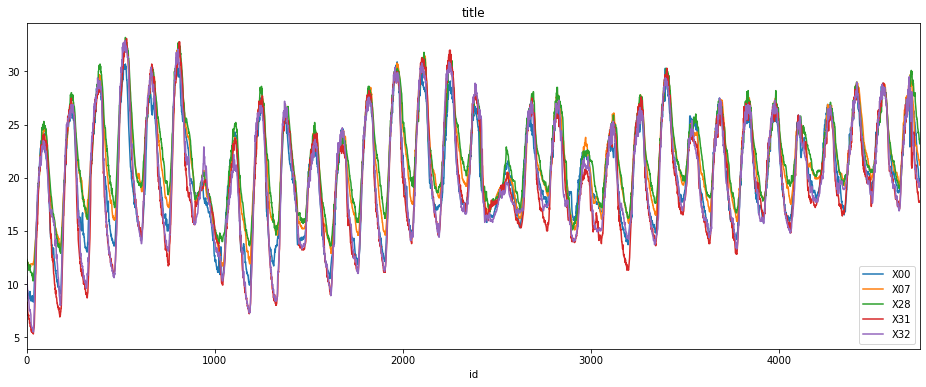

In [0]:
train.plot(x='id', y=temperature_name, figsize=(16,6), title="title")
#x = x축 , y=보고싶은 기상청데이터 종류, figsize=(가로,세로), 타이틀은 옵션

# ㅁ

In [0]:
cd /content/mnt/My Drive/Colab Notebooks

/content/mnt/My Drive/Colab Notebooks


In [0]:
ls

In [0]:
import pandas as pd

train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [0]:
train

In [0]:
trainX = train.iloc[: , :41]
trainY = train.iloc[: , 42:]

In [0]:
trainX

In [0]:
trainY

#4. 변수 선택 및 모델 구축 
Feature Engineering & Initial Modeling

In [0]:
# 간단한 lstm 모델 구축하기 
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, input_shape=sequence.shape[-2:]),
    tf.keras.layers.Dense(256, activation='linear'),
    tf.keras.layers.Dense(128, activation='linear'),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mse')

#5. 모델 학습 및 검증
Model Tuning & Evaluation

In [0]:
# loss가 4미만으로 떨어지면 학습 종료 시키는 기능
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if(logs.get('loss') < 4):
            print('\n Loss is under 4, cancelling training')
            self.model.stop_training = True

In [0]:
callbacks = myCallback()

In [0]:
# 모델 학습
simple_lstm_model.fit(    
    sequence, target,
    epochs=60,
    batch_size=128,
    verbose=2,
    shuffle=False,
    callbacks = [callbacks]
)

In [0]:
# LSTM 레이어는 고정
simple_lstm_model.layers[0].trainable = False

In [0]:
# fine tuning 할 때 사용할 학습데이터 생성 (Y18)
finetune_X, finetune_y = convert_to_timeseries(pd.concat([X_train.tail(432), train['Y18'].tail(432)], axis = 1), interval=12)


In [0]:
# LSTM 레이어는 고정 시켜두고, DNN 레이어에 대해서 fine tuning 진행 (Transfer Learning)
finetune_history = simple_lstm_model.fit(
            finetune_X, finetune_y,
            epochs=20,
            batch_size=64,
            shuffle=False,
            verbose = 2)

In [0]:
# 예측하기 
finetune_pred = simple_lstm_model.predict(X_test)

In [0]:
# 제출 파일 만들기
submit = pd.DataFrame({'id':range(144*33, 144*113),
              'Y18':finetune_pred.reshape(1,-1)[0]})

In [0]:
submit.to_csv('baseline_result.csv', index = False)

#TEST

In [0]:
y18 = train[~train['Y18'].isnull()]['Y18'].reset_index(drop= True)
no_y18_target = ['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08','Y09', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17']
no_y18 = train[(train['Y18'].isnull()) & (train['id'] > 3887)][no_y18_target].reset_index(drop = True)
check_target = pd.concat([no_y18, y18], axis = 1)

In [0]:
correlations =  check_target.corr()
plt.figure(figsize = (14, 12))

# Heatmap of correlations
sns.heatmap(correlations, cmap = plt.cm.RdYlBu_r,  vmin = 0.2, annot = True, vmax = 0.9)
plt.title('Correlation Heatmap');